In [1]:
import numpy as np
import scipy as sp

### Laboratorio 2: Controlabilidad, observabilidad, estabilidad y detectabilidad

#### Profesor: Héctor Ramírez C. 
#### Auxiliar: Matías V. Vera. 
#### Ayudante: S. Adrián Arellano
#### Integrantes: Benjamin Pastene, Maximiliano Lioi

### Pregunta 1

Dado los datos del problema, se puede probar que en el caso de un tanque con $n$ tubos de entrada y $k$ de salida cumple que 

$$ V(t) = V_0 + \sum_{k} ((f_e^k) - f_s)t \ \ ; \ \dot{C}(t) = \frac{\sum_{k} (C^k_e (t) f_e^k) - C(t) \sum_{k} (f_e^k)}{V(t)}$$

Podemos controlar la concentración que entra por el flujo $f_1$, es decir, 

$$C_e^{1} (t) = u(t)$$

Además, por suposiciones del problema, la concentración que entra por $f_5$ es el doble de aquella que entra por $f_1$, es decir, 

$$C_e^{5}(t) = 2u(t)$$

Estudiando las dinámicas, tenemos que en el tanque 1, entra flujo por $f_1$ y sale por $f_2, f_3, f_4$, luego escribimos la dinámica

$$\dot{C_1}(t) = \frac{C_e^{1} f_1 - C_1(t) f_1}{V_1 + t \Delta_1}$$

$$= C_1(t) \frac{-f_1}{V_1 + t \Delta_1} + u(t) \frac{f_1}{V_1 + t \Delta_1}$$

Con respecto al tanque 2, entra flujo por $f_4$ y $f_5$, como el flujo $f_4$ llega desde el tanque 1, entonces como el tanque homogeneiza la mezcla, se deduce que 

$$C_e^{4} (t) = C_1(t)$$

Sale flujo por $f_6$ y $f_7$, por las condiciones del problema, $C_e^5 (t) = 2u(t)$, escribiendo la dinámica se tiene

$$\dot{C_2}(t) = \frac{C_e^4 (t) f_4 + C_e^{5}(t) f_5 - C_2(t)(f_4 + f_5)}{V_2 + t \Delta_2}$$
$$= C_1(t) \frac{f_4}{V_2 + t\Delta_2} + u(t)\frac{2 f_5}{V_2 + t\Delta_2} - C_2(t) \frac{f_4 + f_5}{V_2 + t \Delta_3}$$

Con respecto al tanque 3, entra flujo por $f_3$ desde $T_1$ y por $f_6$ desde $T_2$. Luego como las mezclas se vuelven homogeneas, se tiene que 

$$C_e^{3}(t) = C_1(t) \ \ ; \ \ C_e^{6} = C_2(t)$$

Por lo que la dinámica queda 

$$\dot{C_3} (t) = \frac{C_e^{3} f_3}{V_3 + t \Delta_3} + \frac{C_e^{6} f_6}{V_3 + t \Delta_3} - \frac{C_3(t) (f_3+ f_6)}{V_3 + t \Delta_3}$$

$$ = C_1(t) \frac{f_3}{V_3 + t \Delta_3} + C_2(t) \frac{f_6}{V_3 + t \Delta_3} + C_3(t) \frac{-(f_3 + f_6)}{V_3 + t \Delta_3}$$

### Pregunta 2

Tomando en cuenta las constantes del problema, se tiene que $\Delta_1 = \Delta_2 = \Delta_3 = 0$, por lo que el sistema $\dot{X} = AX + BU$ es independiente del tiempo y con la forma

$$A = \begin{bmatrix}
-\frac{4}{200} &  0 &  0 \\
\frac{1}{100} & -\frac{6}{100} &  0 \\
\frac{2}{300} &  \frac{3}{300} &  -\frac{5}{300}
\end{bmatrix} \
B= \begin{bmatrix}
\frac{4}{200} \\
\frac{10}{100} \\
0
\end{bmatrix}
$$



### Pregunta 3

In [2]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Definir las matrices A y B
A = np.array([[-4/200, 0, 0], [1/100, -6/100, 0], [2/300, 0.01, -5/300]])
B = np.array([4/200, 10/100, 0]).transpose()

# Definimos el control U
u_0 = lambda t: 0
u_2000 = lambda t: 2000
u_cos = lambda t: 2000* np.cos(t)
u_bang_bang = lambda x: 3000 if 0 <= x <= 5 else (-3000 if 5 < x <= 10 else 0) 

# Definir la ecuación diferencial d/dt X = AX + BU

def system_dynamics_u(u):
    def system_dynamics(t, X):
        return np.dot(A, X) + np.dot(B, u(t))
    return system_dynamics

# Condiciones iniciales
X0 = np.array([5000, 0, 1000]).T

# Intervalo de tiempo
t_span = (0, 250)

def grafica_solucion(solution):
    # Extraer la solución
    t = solution.t
    X = solution.y

    # Graficar la solución
    plt.figure(figsize=(10, 6))
    plt.plot(t, X[0], label='C1(t)')
    plt.plot(t, X[1], label='C2(t)')
    plt.plot(t, X[2], label='C3(t)')
    plt.xlabel('Tiempo')
    plt.ylabel('Valores de la concentración')
    plt.legend()
    plt.title('Solución de la ecuación diferencial controlada')
    plt.grid(True)
    plt.show()

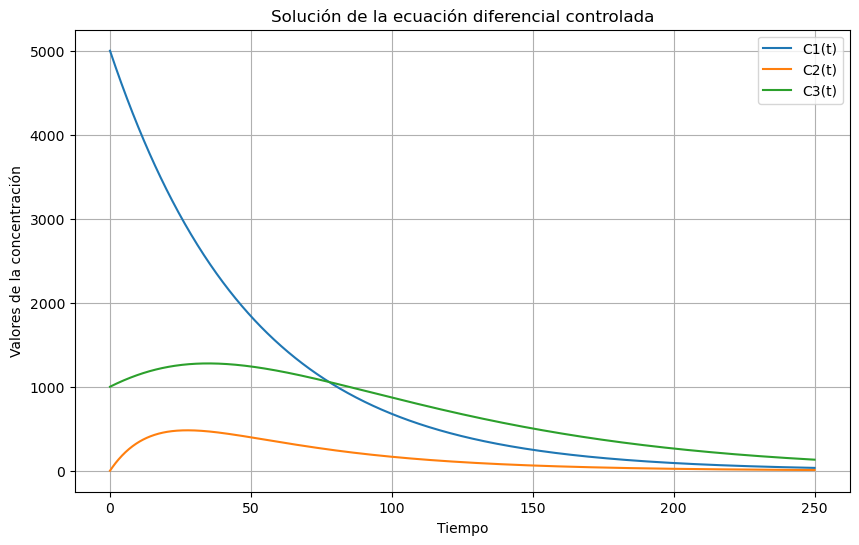

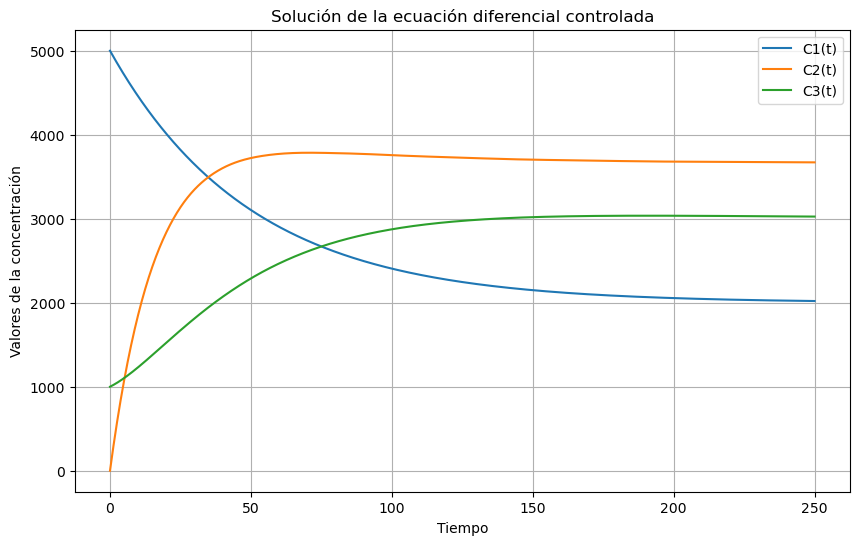

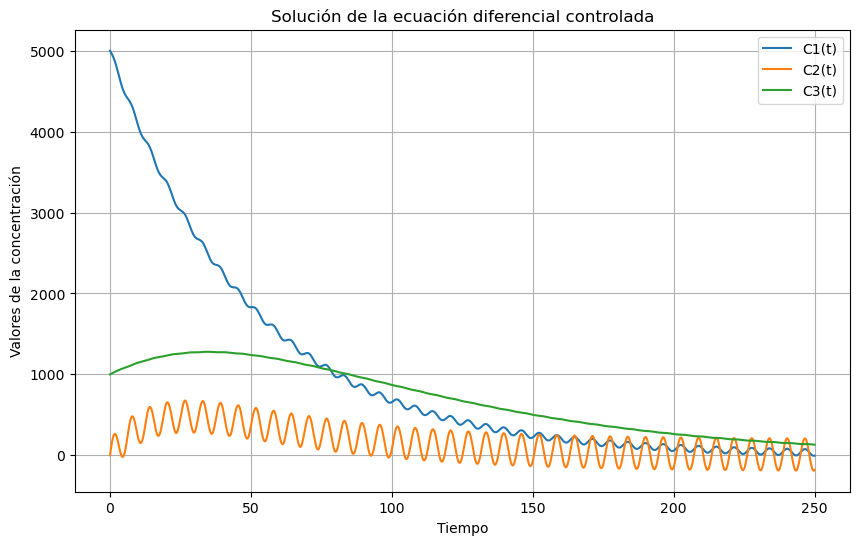

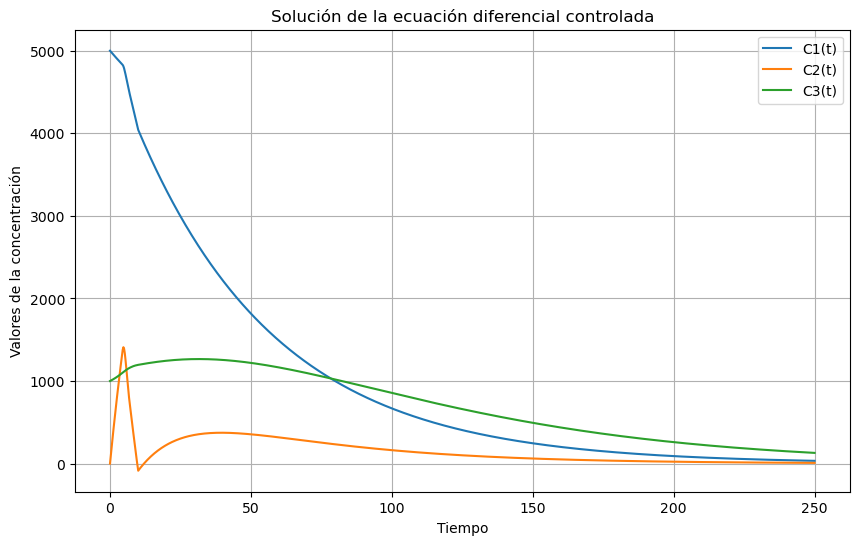

In [3]:
# Resolver la ecuación diferencial utilizando solve_ivp
solucion_u0 = solve_ivp(system_dynamics_u(u_0), t_span, X0, method='RK45', t_eval=np.linspace(0, 250, 1000)) #Nula
solucion_u2000 = solve_ivp(system_dynamics_u(u_2000), t_span, X0, method='RK45', t_eval=np.linspace(0, 250, 1000)) #Constante
solucion_ucos =  solve_ivp(system_dynamics_u(u_cos), t_span, X0, method='RK45', t_eval=np.linspace(0, 250, 1000)) #Sinusolidal
solucion_ubangbang = solve_ivp(system_dynamics_u(u_bang_bang), t_span, X0, method='RK45', t_eval=np.linspace(0, 250, 1000)) #BangBang

# Grafica las soluciones
grafica_solucion(solucion_u0)
grafica_solucion(solucion_u2000)
grafica_solucion(solucion_ucos)
grafica_solucion(solucion_ubangbang)

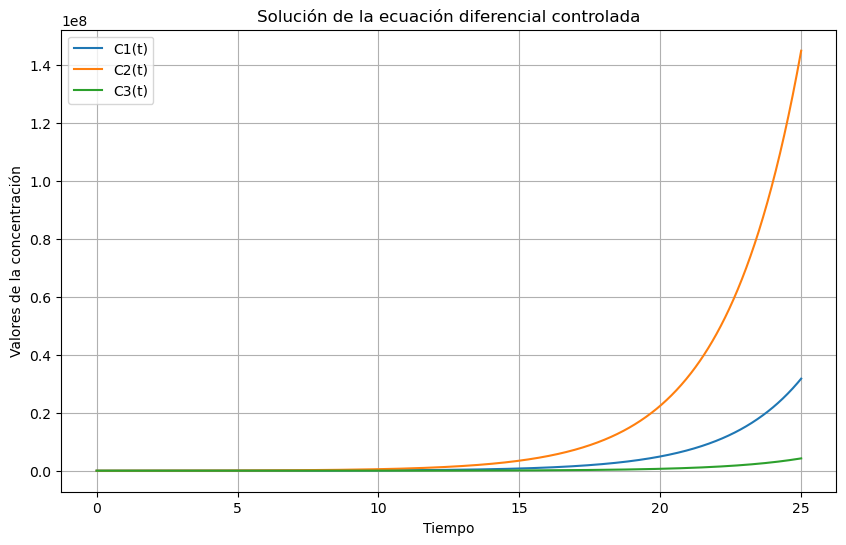

In [4]:
# Resolución para un control tipo feedback, u(t) = K x(t) ,como m= 1, K \in R^ (1 x n)

K = [10,2,4] 

def system_dynamics_feedback(t, X):
    return np.dot(A, X) + np.dot(B, np.dot(K,X))

# Condiciones iniciales
X0 = np.array([5000, 0, 1000])

# Intervalo de tiempo
t_span = (0, 25)

solucion_feedback =  solve_ivp(system_dynamics_feedback, t_span, X0, method='RK45', t_eval=np.linspace(0, 25, 1000)) #Feedback

grafica_solucion(solucion_feedback)

### Problema 4

In [5]:
# Escribimos la matriz de Kalman

# Definir las matrices A y B

# Definir las matrices A y B
A = np.array([[-4/200, 0, 0], [1/100, -6/100, 0], [2/300, 0.01, -5/300]])
B = np.array([4/200, 10/100, 0]).reshape(-1, 1)  # Convierte B en una matriz de una sola columna

# Defiinir matrices para la matriz de Kalman
AB = np.dot(A, B)
A2B = np.dot(np.dot(A, A), B)

Kalman = np.concatenate((B, AB, A2B), axis=1)

print(Kalman)

[[ 2.00000000e-02 -4.00000000e-04  8.00000000e-06]
 [ 1.00000000e-01 -5.80000000e-03  3.44000000e-04]
 [ 0.00000000e+00  1.13333333e-03 -7.95555556e-05]]


Comparamos con el paquete $\textit{control}$ de Python

In [6]:
from control import ctrb

Kalman_ctrb = ctrb(A,B.reshape(-1,1))

print(Kalman)

[[ 2.00000000e-02 -4.00000000e-04  8.00000000e-06]
 [ 1.00000000e-01 -5.80000000e-03  3.44000000e-04]
 [ 0.00000000e+00  1.13333333e-03 -7.95555556e-05]]


Se verifica que son iguales, veamos si es controlable estudiando el rango de la matriz

In [7]:
rg_Kalman = np.linalg.matrix_rank(Kalman)
print('El rango de la Matriz de Kalman es:', rg_Kalman)

El rango de la Matriz de Kalman es: 3


Verificamos que el sistema es controlable pues la matriz de Kalman tiene rango completo

### Pregunta 5

Consideramos un observador de los estados $C_2, C_3$ de la forma

$$Y = CX$$

La matriz $C$ debe ser de la forma

$$C = \begin{bmatrix}
0 &  1 &  0 \\
0 & 0 &  1
\end{bmatrix}$$

Para que la observación sea 

$$Y = \begin{bmatrix} 
C_2 \\
C_3
\end{bmatrix} = \begin{bmatrix}
0 &  1 &  0 \\
0 & 0 &  1
\end{bmatrix} X$$

In [8]:
# Escribimos la matriz de Observabilidad

# Definir las matrices A y C
A = np.array([[-4/200, 0, 0], [1/100, -6/100, 0], [2/300, 0.01, -5/300]])
C = np.matrix([[0, 1, 0], [0, 0, 1]])

CA = np.dot(C, A)
CA2 = np.dot(C, np.dot(A, A))

Obs = np.concatenate((C, CA, CA2), axis=0)

print('Matriz de observabilidad:', Obs)

Matriz de observabilidad: [[ 0.00000000e+00  1.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]
 [ 1.00000000e-02 -6.00000000e-02  0.00000000e+00]
 [ 6.66666667e-03  1.00000000e-02 -1.66666667e-02]
 [-8.00000000e-04  3.60000000e-03  0.00000000e+00]
 [-1.44444444e-04 -7.66666667e-04  2.77777778e-04]]


In [9]:
from control import obsv

C = np.matrix([[0, 1, 0], [0, 0, 1]])

O = obsv(A,C)
print('Matriz de observabilidad:', O)

rg_O = np.linalg.matrix_rank(O)

print('El rango de la Matriz de Observabilidad es:', rg_O)

Matriz de observabilidad: [[ 0.00000000e+00  1.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]
 [ 1.00000000e-02 -6.00000000e-02  0.00000000e+00]
 [ 6.66666667e-03  1.00000000e-02 -1.66666667e-02]
 [-8.00000000e-04  3.60000000e-03  0.00000000e+00]
 [-1.44444444e-04 -7.66666667e-04  2.77777778e-04]]
El rango de la Matriz de Observabilidad es: 3


Verificamos que el sistema es observable pues la matriz $\mathcal{O}$ tiene rango completo y que coincide con la funcion $\textit{obsv}$ de $\textit{control}$

### Pregunta 6

Calculemos la forma canónica de Brunovski del sistema, para ello, debemos buscar el polinomio característico $p_{A}(\lambda) = det(A - \lambda I)$.

Computando vía subdeterminante en la primera fila
$$
det(A - \lambda I) = \det 
\begin{bmatrix}
-\frac{4}{200} - \lambda &  0 &  0 \\
\frac{1}{100} & -\frac{6}{100} -\lambda &  0 \\
\frac{2}{300} &  \frac{3}{300} &  -\frac{5}{300} -\lambda
\end{bmatrix} = (- \frac{1}{50} - \lambda) \det
\begin{bmatrix}
-\frac{6}{100} - \lambda & 0 \\
\frac{1}{100} & -\frac{1}{60} - \lambda
\end{bmatrix}
$$

$$= (-\frac{1}{50} - \lambda) (\frac{6}{100} + \lambda) (\frac{1}{60} + \lambda)$$
$$-(\lambda^3 + \frac{29}{300} \lambda^2 + \frac{19}{7500} \lambda + \frac{1}{50000})$$

Luego 

$$p_{A}(\lambda) = \lambda^3 + \frac{29}{300} \lambda^2 + \frac{19}{7500} \lambda + \frac{1}{50000}$$

Tenemos $a_1 = \frac{29}{300} \approx -0.0967$, $a_2 = \frac{19}{7500} \approx -0.00253$, $a_3 = \frac{1}{50000} \approx -0.00002$, con lo que se obtiene la forma de Brunovski

$$\hat{A} = \begin{bmatrix}
0 &  1 &  0 \\
0 &  0 &  1 \\
-\frac{1}{50000} &  -\frac{19}{7500} &  -\frac{29}{300}
\end{bmatrix} \ ; \ \hat{B} = \begin{bmatrix}
0 \\
0 \\ 
1
\end{bmatrix}$$

$$\hat{A} = \begin{bmatrix}
0 &  1 &  0 \\
0 &  0 &  1 \\
-0.00002 &  -0.00253 &  -0.0967
\end{bmatrix} \ ; \ \hat{B} = \begin{bmatrix}
0 \\
0 \\ 
1
\end{bmatrix}$$

Utilizamos la librería $\textit{control}$ junto al método $\textit{canonical form}$ para comparar los resultados obtenidos, teniendo de aplicar una sola observación pues se tienen problemas para sistemas observados por más de una variable.

In [10]:
import control as ctrl

# Definimos matrices

A = np.matrix([[-4/200, 0, 0], [1/100, -6/100, 0], [2/300, 0.01, -5/300]])
B = np.array([4/200, 10/100, 0]).reshape(-1, 1)
C = np.array([0, 1, 0])

# Creamos sistema de control (con una sola observacion)
sys = ctrl.ss(A,B,C,0)
A_Brunovski = ctrl.canonical_form(sys, form='reachable')
A_Brunovski[0]

StateSpace(array([[-9.66666667e-02, -2.53333333e-03, -2.00000000e-05],
       [ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00]]), array([[1.],
       [0.],
       [0.]]), array([[1.00000000e-01, 3.86666667e-03, 3.66666667e-05]]), array([[0.]]))

Nos entrega el sistema canónico de la forma

$$\hat{A} = \begin{bmatrix}
-0.0967 &  -0.00253 &  -0.00002 \\
1 &  0 &  0 \\
0 &  1 &  0
\end{bmatrix} \ ; \ \hat{B} = \begin{bmatrix}
1 \\
0 \\ 
0
\end{bmatrix}$$

Que notamos representa un sistema equivalente al propuesto de manera teórica con la forma vista en clases.

### Pregunta 7

Se debe construir un estabilizador por feedback lineal $\vec{U} = - K \vec{X}$. Para ello, se usan los comandos $\textit{place}$ y $\textit{lqr}$ para obtener una matriz de ganancia adecuada $K$, esto es, $A - BK$ es Hurwitz

Veamos primero la construcción del estabilizador con $\textit{place}$

La matriz K= [[-1024562.26750565   204981.48683446   699174.58330735]]


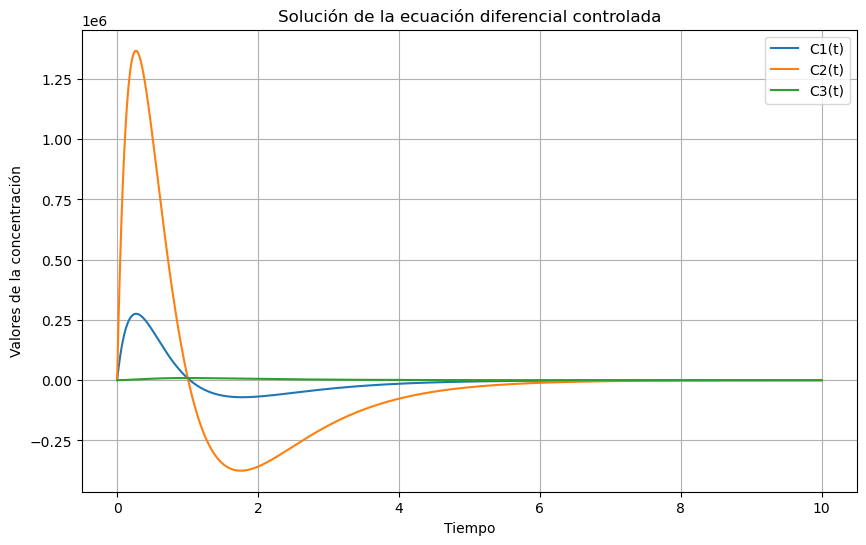

In [11]:
import control as ctrl
import numpy as np
# Estructura
# control.place(A, B, p)
# A (2D array_like) – Dynamics matrix
# B (2D array_like) – Input matrix
# p (1D array_like) – Desired eigenvalue locations

# Definimos matrices

A = np.matrix([[-4/200, 0, 0], [1/100, -6/100, 0], [2/300, 0.01, -5/300]]) #(3 x 3)
B = np.matrix([4/200, 10/100, 0]).T #(3 x 1)

# Construimos estabilizador por feedback lineal
def system_dynamics_linear_feedback(K):
    def system_dynamics_feedback(t, X):
        return np.dot(A, X.T) + np.dot(B, np.dot(-K,X.T))
    return system_dynamics_feedback
    
# Construcción de K - place (1 x 3)

K = ctrl.place(A, B, [-2, -4, -1])
K_ob = ctrl.place(A, B, [-2, -4, -1])
print("La matriz K=", K)

# Condiciones iniciales
X0 = np.array([200, 5, 100])

# Intervalo de tiempo
t_span = (0, 10)

solucion_feedback =  solve_ivp(system_dynamics_linear_feedback(K_ob), t_span, X0, method='RK45', t_eval=np.linspace(0, 10, 1000)) #Feedback

grafica_solucion(solucion_feedback)

$\textbf{Nota:}$ Se respetan las condiciones iniciales del problema, pero debido a las magnitudes que toma la concentración de los tanques no se logra apreciar, se encuentra en escala $\approx 10^7$, por lo que números del orden de $\approx 10^3$ se ven muy cercanos al cero

Verificamos que el sistema es estabilizable usando $\textit{place}$ notando $||x(t)|| \rightarrow 0$, recordar que $\bar{x} = 0$ es punto de equilibrio de la ecuación $\dot{x} = (A - BK)x$. Notamos además que toma valores muy altos a pesar de estabilizarse

Veamos la construicción del estabilizador usando $\textit{lqr}$. La función $\textit{lqr()}$ calcula el control óptimo de tipo feedback lineal $\vec{U} = -K \vec{X}$ que minimiza el costo cuadrático.

$$\min_{u(\cdot)} J(u) = \int_{0}^{\infty} (x^T Q x + u^T R u + 2 x^T N u) dt$$

Para construir las matrices $Q$ y $R$ que bajo la teoría, deben ser definidas positivas y tomando $N = 0$ y juntando bien las dimensiones de las matrices a utilizar, escogemos

$$Q = I ; R = 1$$

La matriz K= [[0.2208701  0.33782777 0.15650817]]


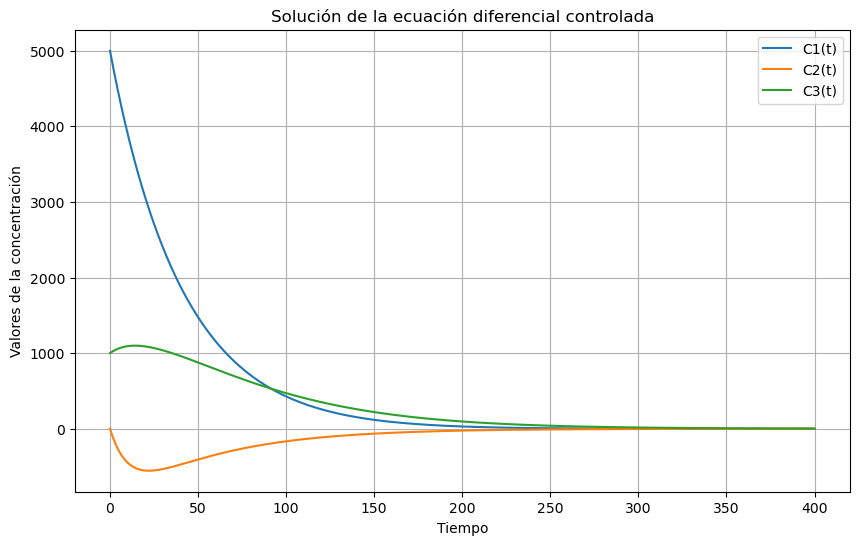

In [12]:
import control as ctrl

# Definimos matrices

A = np.matrix([[-4/200, 0, 0], [1/100, -6/100, 0], [2/300, 0.01, -5/300]]) #(3 x 3)
B = np.matrix([4/200, 10/100, 0]).T #(3 x 1)
Q = np.eye(3)
R = 2

K_lqr, S, E = ctrl.lqr(A, B, Q, R)
print("La matriz K=", K_lqr)

# Condiciones iniciales
X0 = np.array([5000, 0, 1000])

# Intervalo de tiempo
t_span = (0, 10000)

solucion_feedback =  solve_ivp(system_dynamics_linear_feedback(K_lqr), t_span, X0, method='RK45', t_eval=np.linspace(0, 400, 10000)) #Feedback

grafica_solucion(solucion_feedback)

Verificamos que el sistema es estabilizable con la matriz entregada por el método $\textit{lqr}$, sin embargo, es importante notar que el tiempo en que llega a cero el sistema, es para un $T>0$ considerablente mayor ($\approx 300$) que para el tiempo con la matriz entregada por $\textit{place}$ ($\approx T = 6$).

In [13]:
# Definimos función que verifica si el sistema es estabilizable, esto es, A - BK es Hurwitz

def Hurwitz(M):
    eigvalues, eigvectors = np.linalg.eig(M)
    return eigvalues

M = A - B @ K
eig = Hurwitz(M)
print("Los valores propios de la matriz A-BK:", eig, ". Es Hurwitz!")

Los valores propios de la matriz A-BK: [-4.00000008 -1.99999977 -1.00000015] . Es Hurwitz!


Además verificamos que los valores propios son aquellos que fueron impuestos para hacer la matriz Hurwitz

Verificamos que el sistema es estabilizable mediante la funcion lqr

In [14]:
K_lqr, S, E = ctrl.lqr(A, B, Q, R)
N = A - B @ K_lqr
eig_lqr = Hurwitz(N)
print("Los valores propios de la matriz A-BK:", eig_lqr, ". Es Hurwitz!")

Los valores propios de la matriz A-BK: [-0.09271624+0.j         -0.0210753 +0.00185212j -0.0210753 -0.00185212j] . Es Hurwitz!


Verificamos que la matriz $K$ es tal que $A-BK$ es Hurwitz

### Pregunta 8

Se construye el observador de Luenberger asociado al sistema controlado y observado. 

$$\dot{X} = AX + BU$$
$$Y = CX$$

$$A = \begin{bmatrix}
-\frac{4}{200} &  0 &  0 \\
\frac{1}{100} & -\frac{6}{100} &  0 \\
\frac{2}{300} &  \frac{3}{300} &  -\frac{5}{300}
\end{bmatrix} \
B= \begin{bmatrix}
\frac{4}{200} \\
\frac{10}{100} \\
0
\end{bmatrix} \ C = \begin{bmatrix}
0 &  1 &  0 \\
0 & 0 &  1
\end{bmatrix}
$$

Consideramos entonces el sistema

$$\dot{\hat{X}} = A \hat{X} + B u + L(\hat{Y} - Y) \ ; \ \hat{X}(0) = \hat{X}_0 \ \text{conocido}$$
$$\hat{Y} = C \hat{X}$$

Nos interesa escoger $L \in \mathbb{R}^{n \times p}$ de manera que la matriz $A + LC$ sea Hurwitz, de esta manera se tiene que el error del estimador $e_x = \hat{X} - X$ que sigue la dinámica

$$\dot{e_x}(t) = (A + LC) e_x(t) \ ; \ e_x(0) = \hat{X}_0 - X(0)$$

Sea tal que 

$$e_x \rightarrow 0$$

Independiente del valor $X(0)$ para un tiempo suficientemente grande.

Se sabe de Álgebra Lineal que las matrices $ A + LC $ y $(A + LC)^T = A^T + C^T L^T$ tienen mismos valores propios, pues transponer una matriz no altera estos, luego

$$A+LC \ \text{es Hurwitz} \iff A^T + C^T L^T \ \text{es Hurwitz}$$

Luego podemos usar el comando place para crear una matriz $L^T$ adecuada usando el sistema de control transpuesto $(A^T, C^T)$ y encontrar $L$ buscado transponiendo la matriz

Recordar que para un sistema controlado $(A,B)$, el comando $\textit{place}$ entrega $K$ tal que $A-BK$ es Hurwitz, por lo tanto, consideramos el sistema controlado $(A^T, -C^T)$ de manera que el $K = L^T$ sea tal que 

$$(A^T + C^T K) = (A^T + C^T L^T) \ \text{es Hurwitz}$$


In [15]:
# Definir las matrices A y C
A = np.matrix([[-4/200, 0, 0], [1/100, -6/100, 0], [2/300, 0.01, -5/300]])
A_dual = A.T
C = np.matrix([[0, 1, 0], [0, 0, 1]])
C_dual = -C.T

# Construcción de L_dual - place (3 x 2)
poles = [-4, -1, -1]
L_dual = ctrl.place(A_dual, C_dual, poles)
L = L_dual.T

print("La matriz L calibrada=", L)

# Vemos si A+LC tiene dichos polos y verificar que es Hurwitz
O = A + L @ C
print('Se verifica que los polos de A + LC son:', Hurwitz(O), '. Es Hurwitz!')

La matriz L calibrada= [[-270.02769231 -180.01846154]
 [  -3.69538462   -1.83692308]
 [  -1.84692308   -2.20794872]]
Se verifica que los polos de A + LC son: [-1. -4. -1.] . Es Hurwitz!


Consideramos entonces el sistema

$$\dot{\hat{X}} = A \hat{X} + B U + L(\hat{Y} - Y) \ ; \ \hat{X}(0) = \hat{X}_0 \ \text{conocido}$$
$$\hat{Y} = C \hat{X}$$

Para el $L$ recién encontrado, considerando distintas condiciones $\hat{X_0}$

In [16]:
from scipy import interpolate
from scipy.interpolate import krogh_interpolate
from scipy.interpolate import KroghInterpolator

# Definimos el observador de Luenberger

# Definir las matrices A y B
A = np.array([[-4/200, 0, 0], [1/100, -6/100, 0], [2/300, 0.01, -5/300]])
B = np.array([4/200, 10/100, 0]).transpose()
C = np.array([[0, 1, 0], [0, 0, 1]])

# Creamos L que estabiliza el error
poles = [-3, -2, -3]
L_dual = ctrl.place(A_dual, C_dual, poles)
L = L_dual.T

# Interpolamos la solución X(t) para tener una función analítica, de la cual desprender la observación Y(t) = C X(t)
def Y_obsv_u_C(C, solucion):
    observed_ucos = solucion.y
    x_observed = solucion.t
    observed_interpolate = interpolate.interp1d(x_observed, observed_ucos) # X(t)
    def Y_obsv(t):
        return C @ observed_interpolate(t) # Y(t) = CX(t)
    return Y_obsv

# Definimos la dinámica para el observador de Luenberger
def system_obsv_u(u, C, Y, L):
    def system_obvs(t, hat_X):
        return np.dot(A, hat_X) + np.dot(B, u(t)) + L @ (C @ hat_X - Y(t)) #Y(t) = C X(t)
    return system_obvs

# Definimos función para graficar la observacion
def grafica_observacion(observacion):
    # Extraer la solución
    t = observacion.t
    X = observacion.y
    # Graficar la solución
    plt.figure(figsize=(10, 6))
    plt.plot(t, X[0], label='C1_obs(t)')
    plt.plot(t, X[1], label='C2_obs(t)')
    plt.plot(t, X[2], label='C3_obs(t)')
    plt.xlabel('Tiempo')
    plt.ylabel('Valores de la concentración')
    plt.legend()
    plt.title( r'Observador de Luenberger $\hat{X}(t)$ para sistema controlado')
    plt.grid(True)
    plt.show()
    
# Definimos función para graficar el error
def grafica_error(solucion, observacion):
    # Extraer la solución
    t = observacion.t
    X_sol = solucion.y
    X_obs = observacion.y
    error = X_obs - X_sol
    # Graficar la solución
    plt.figure(figsize=(10, 6))
    plt.plot(t, error[0], label='error_obs(t)')
    plt.plot(t, error[1], label='error_obs(t)')
    plt.plot(t, error[2], label='error_obs(t)')
    plt.xlabel('Tiempo')
    plt.ylabel('Diferencia de valores de la concentración reales y observados')
    plt.legend()
    plt.title( r'Error del observador de Luenberger para sistema controlado $\hat{X}(t) - X(t)$')
    plt.grid(True)
    plt.show()

In [17]:
# Definimos el control U
u_0 = lambda t: 0
u_2000 = lambda t: 2000
u_cos = lambda t: 2000* np.cos(t)
u_bang_bang = lambda x: 3000 if 0 <= x <= 5 else (-3000 if 5 < x <= 10 else 0) 

In [18]:
# Definir las matrices A y B
A = np.array([[-4/200, 0, 0], [1/100, -6/100, 0], [2/300, 0.01, -5/300]])
B = np.array([4/200, 10/100, 0]).transpose()

# Observación C (Y = Y(C) = CX) conocida
C = np.array([[0, 1, 0], [0, 0, 1]])

# Tiempo final de simulación
tf = 400
discr = 10*tf

# Intervalo de tiempo
t_span = (0, tf)

# Condición inicial del estimador de Luenberger (conocido)
X_hat_0 = np.array([3000, 200, 800]).T

# Condición inicial real del problema (desconocido)
X0 = np.array([5000, 0, 1000]).T

# Solución del problema controlado 
solucion_u0 = solve_ivp(system_dynamics_u(u_0), t_span, X0, method='RK45', t_eval=np.linspace(0, tf, discr)) #Nula
solucion_u2000 = solve_ivp(system_dynamics_u(u_2000), t_span, X0, method='RK45', t_eval=np.linspace(0, tf, discr)) #Constante
solucion_ucos =  solve_ivp(system_dynamics_u(u_cos), t_span, X0, method='RK45', t_eval=np.linspace(0, tf, discr)) #Sinusolidal
solucion_ubangbang = solve_ivp(system_dynamics_u(u_bang_bang), t_span, X0, method='RK45', t_eval = np.linspace(0, tf, discr)) #Bang Bang

# Observación
Y_obsv_u0 = Y_obsv_u_C(C, solucion_u0)
Y_obsv_u2000 = Y_obsv_u_C(C, solucion_u2000)
Y_obsv_ucos = Y_obsv_u_C(C, solucion_ucos)
Y_obsv_ubangbang = Y_obsv_u_C(C, solucion_ubangbang)

# Estimador de Luenberger para el problema controlado
obsv_luenberger_u0 = solve_ivp(system_obsv_u(u_0, C, Y_obsv_u0, L), t_span, X_hat_0, method='RK45', t_eval=np.linspace(0, tf, discr))
obsv_luenberger_u2000 = solve_ivp(system_obsv_u(u_2000, C, Y_obsv_u2000, L), t_span, X_hat_0, method='RK45', t_eval=np.linspace(0, tf, discr))
obsv_luenberger_ucos = solve_ivp(system_obsv_u(u_cos, C, Y_obsv_ucos, L), t_span, X_hat_0, method='RK45', t_eval=np.linspace(0, tf, discr))
obsv_luenberger_ubangbang = solve_ivp(system_obsv_u(u_bang_bang, C, Y_obsv_ubangbang, L), t_span, X_hat_0, method='RK45', t_eval=np.linspace(0, tf, discr))

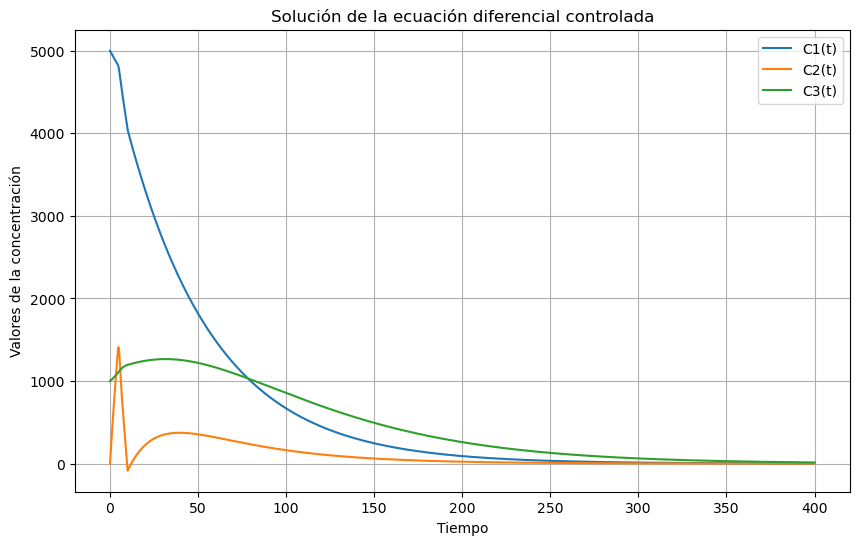

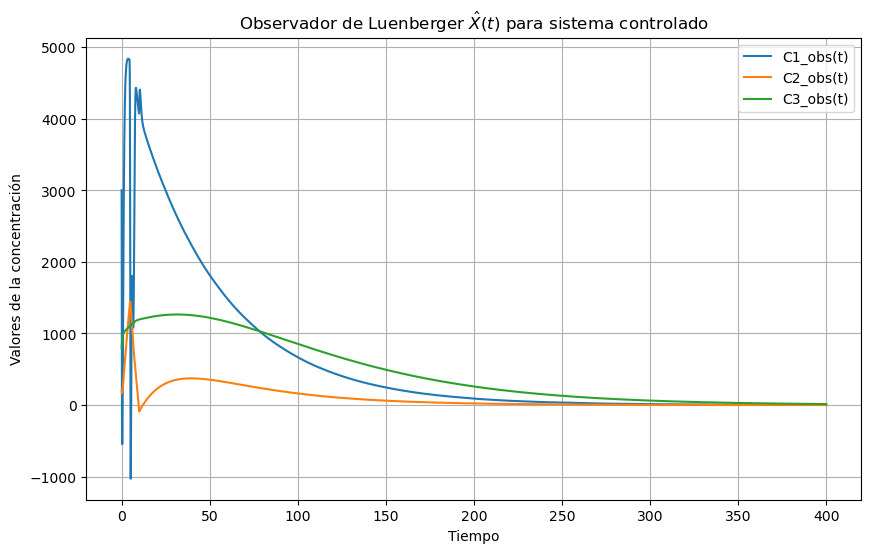

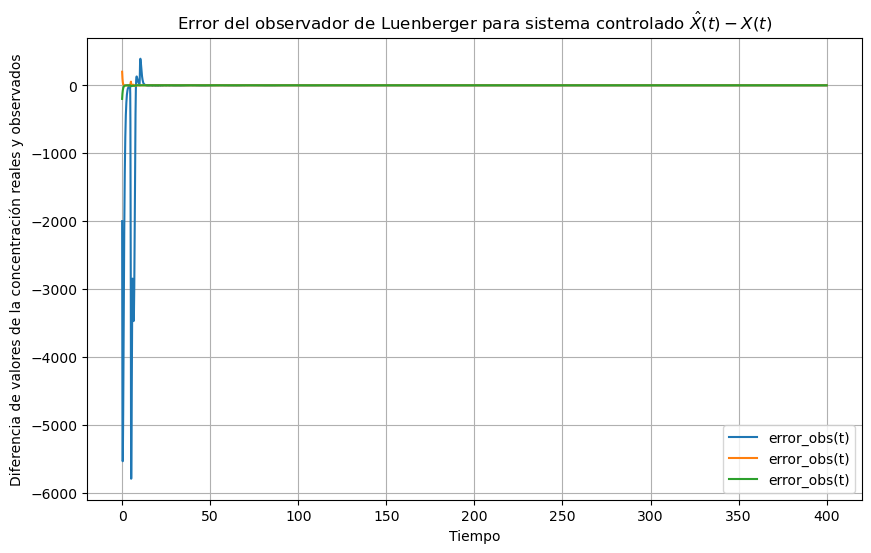

In [19]:
# Rendimiento del estimador de Luenberger con sistema controlado Bang Bang
grafica_solucion(solucion_ubangbang)
grafica_observacion(obsv_luenberger_ubangbang)
grafica_error(solucion_ubangbang, obsv_luenberger_ubangbang)

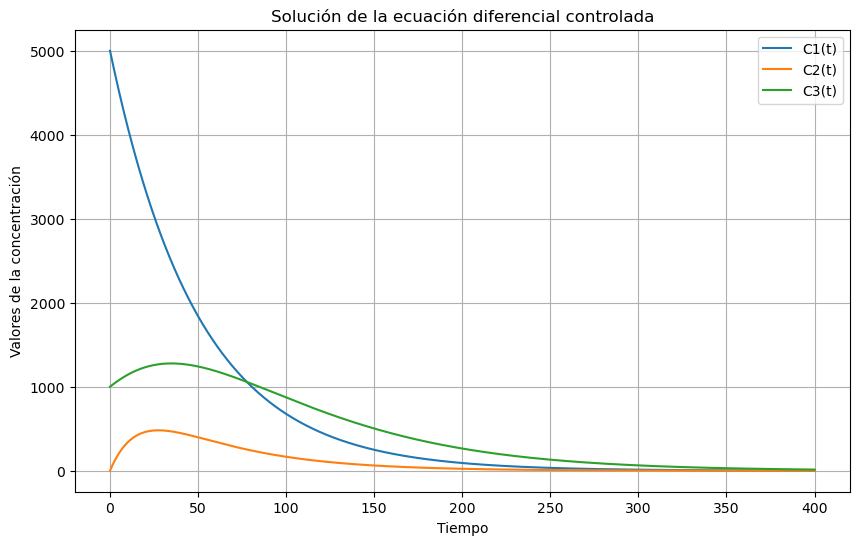

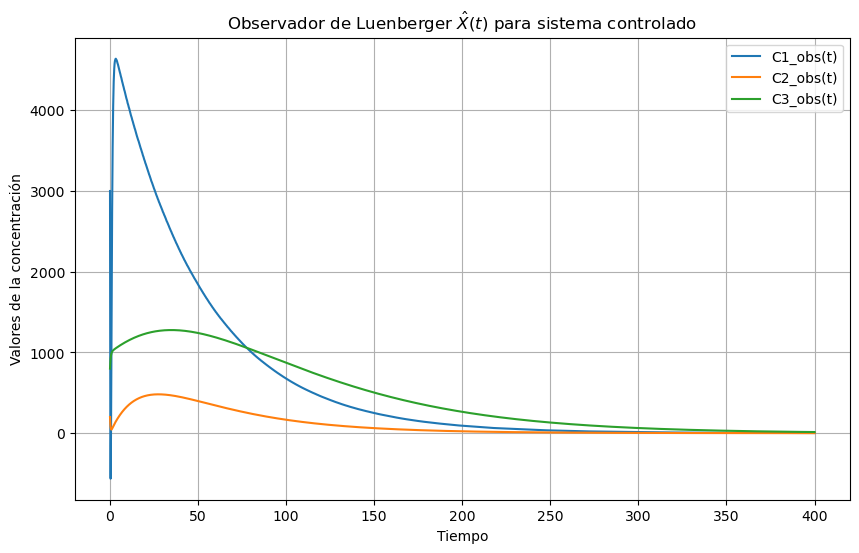

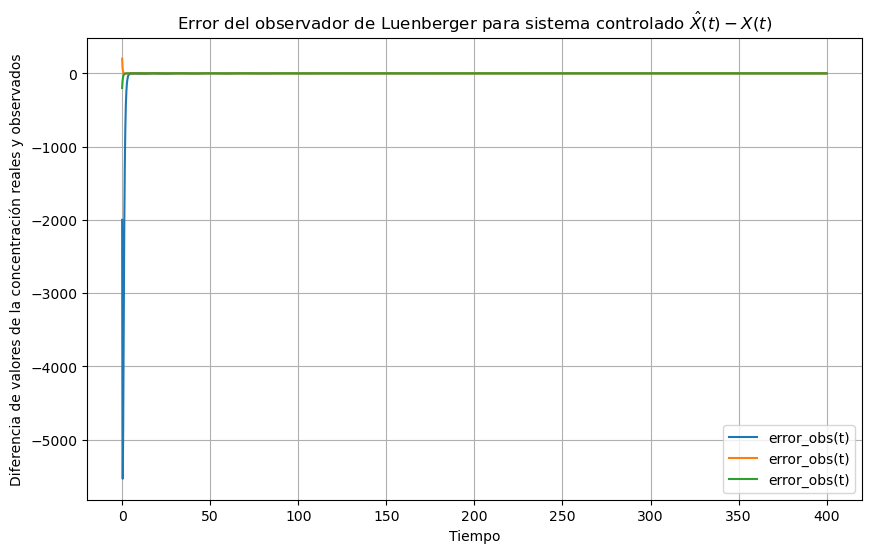

In [20]:
# Rendimiento del estimador de Luenberger con sistema con control nulo
grafica_solucion(solucion_u0)
grafica_observacion(obsv_luenberger_u0)
grafica_error(solucion_u0, obsv_luenberger_u0)

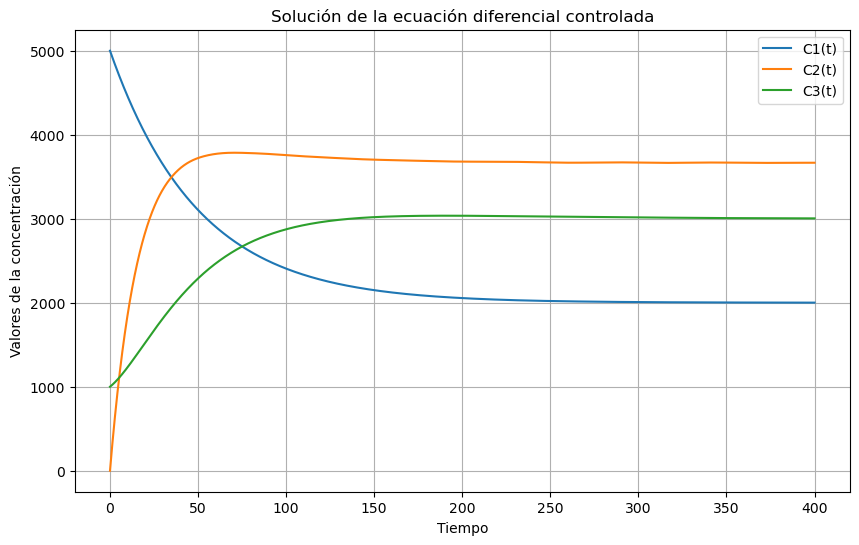

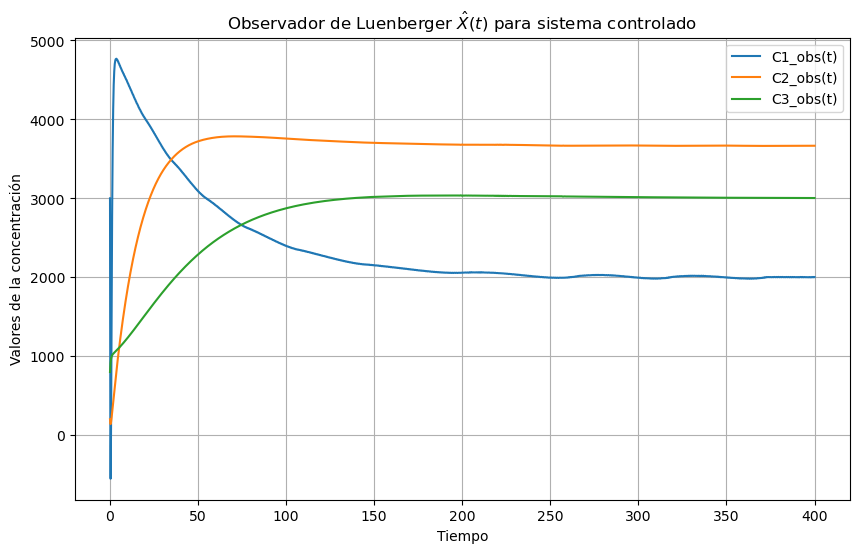

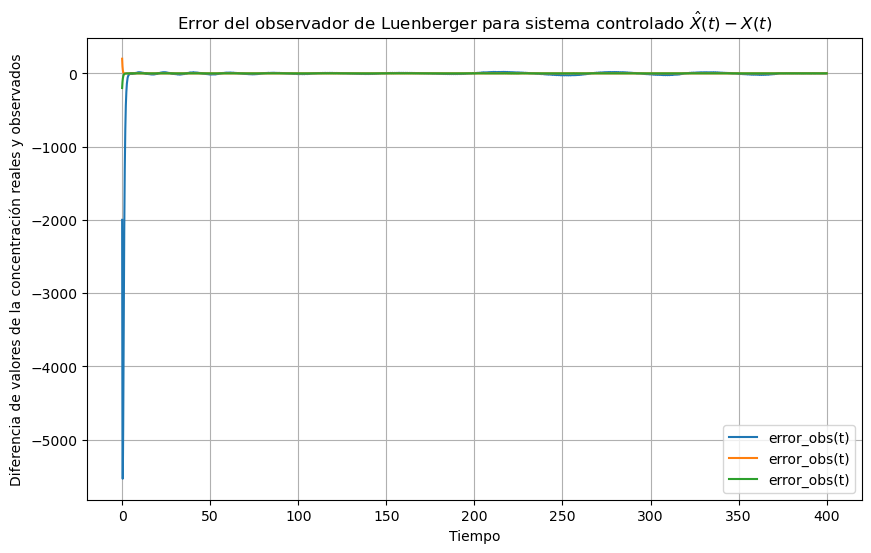

In [21]:
# Rendimiento del estimador de Luenberger con sistema con control constante u = 2000
grafica_solucion(solucion_u2000)
grafica_observacion(obsv_luenberger_u2000)
grafica_error(solucion_u2000, obsv_luenberger_u2000)

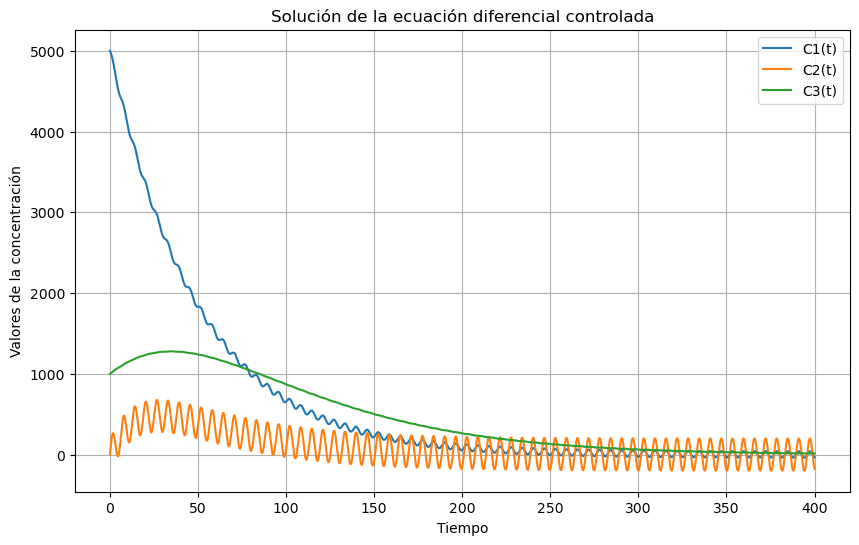

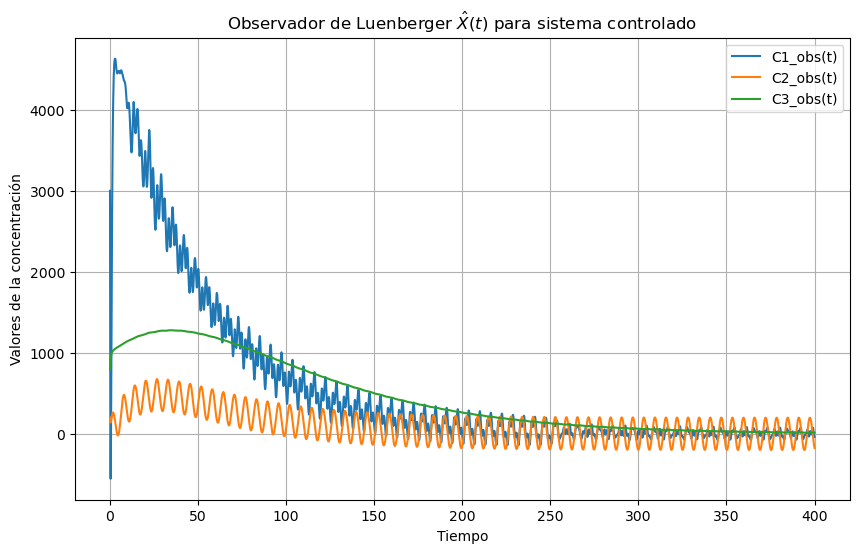

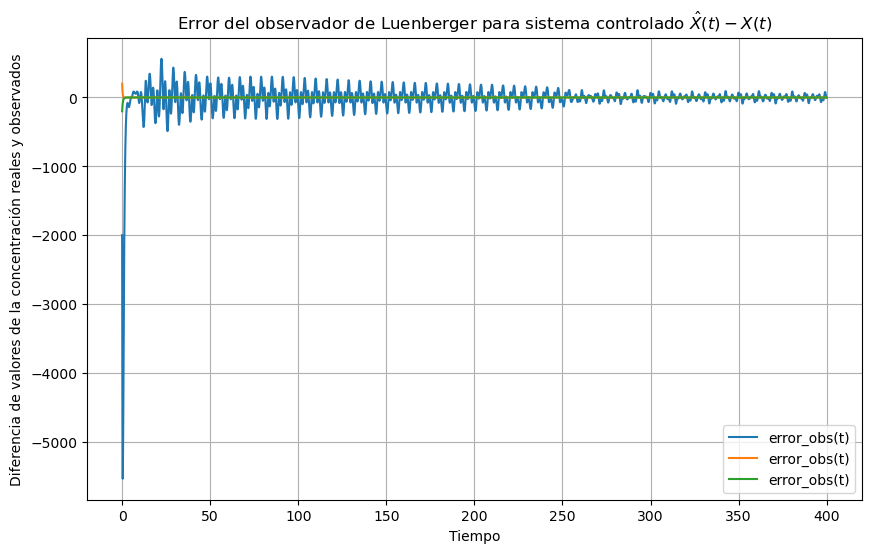

In [22]:
# Rendimiento del estimador de Luenberger con sistema con control sinusoidal
grafica_solucion(solucion_ucos)
grafica_observacion(obsv_luenberger_ucos)
grafica_error(solucion_ucos, obsv_luenberger_ucos)

Notamos que en todos los casos las soluciones $\hat{X}$ que se obtienen apartir de la observación y la solución real $X$ se acercan asintóticamente para $T>0$ suficientemente largo. Probemos con otro tipo de observaciones $Y(\cdot)$.

Tomamos 
$$Y(t) = \begin{bmatrix}
C_2(t) - C_1(t) \\
4C_2(t) + 2C_3(t)
\end{bmatrix}
= \begin{bmatrix}
-1 & 1 &0 \\
0 & 4 & 2
\end{bmatrix} X
$$

In [23]:
# Definir las matrices A y B
A = np.array([[-4/200, 0, 0], [1/100, -6/100, 0], [2/300, 0.01, -5/300]])
B = np.array([4/200, 10/100, 0]).transpose()

# Observación C (Y = Y(C) = CX) conocida
C = np.array([[-1, 1, 0], [0, 4, 2]])

# Definir las matrices A y C
A_dual = A.T
C_dual = -C.T

# Construcción de L_dual - place (3 x 2)
poles = [-4, -1, -1]
L_dual = ctrl.place(A_dual, C_dual, poles)
L = L_dual.T

print("La matriz L calibrada=", L)

# Vemos si A+LC tiene dichos polos y verificar que es Hurwitz
O = A + L @ C
print('Se verifica que los polos de A + C A son:', Hurwitz(O), '. Es Hurwitz!')

# Tiempo final de simulación
tf = 400
discr = 10*tf

# Intervalo de tiempo
t_span = (0, tf)

# Condición inicial del estimador de Luenberger (conocido)
X_hat_0 = np.array([3000, 200, 800]).T

# Condición inicial real del problema (desconocido)
X0 = np.array([5000, 0, 1000]).T

# Solución del problema controlado 
solucion_u0 = solve_ivp(system_dynamics_u(u_0), t_span, X0, method='RK45', t_eval=np.linspace(0, tf, discr)) #Nula
solucion_u2000 = solve_ivp(system_dynamics_u(u_2000), t_span, X0, method='RK45', t_eval=np.linspace(0, tf, discr)) #Constante
solucion_ucos =  solve_ivp(system_dynamics_u(u_cos), t_span, X0, method='RK45', t_eval=np.linspace(0, tf, discr)) #Sinusolidal
solucion_ubangbang = solve_ivp(system_dynamics_u(u_bang_bang), t_span, X0, method='RK45', t_eval = np.linspace(0, tf, discr)) #Bang Bang

# Observación
Y_obsv_u0 = Y_obsv_u_C(C, solucion_u0)
Y_obsv_u2000 = Y_obsv_u_C(C, solucion_u2000)
Y_obsv_ucos = Y_obsv_u_C(C, solucion_ucos)
Y_obsv_ubangbang = Y_obsv_u_C(C, solucion_ubangbang)

# Estimador de Luenberger para el problema controlado
obsv_luenberger_u0 = solve_ivp(system_obsv_u(u_0, C, Y_obsv_u0, L), t_span, X_hat_0, method='RK45', t_eval=np.linspace(0, tf, discr))
obsv_luenberger_u2000 = solve_ivp(system_obsv_u(u_2000, C, Y_obsv_u2000, L), t_span, X_hat_0, method='RK45', t_eval=np.linspace(0, tf, discr))
obsv_luenberger_ucos = solve_ivp(system_obsv_u(u_cos, C, Y_obsv_ucos, L), t_span, X_hat_0, method='RK45', t_eval=np.linspace(0, tf, discr))
obsv_luenberger_ubangbang = solve_ivp(system_obsv_u(u_bang_bang, C, Y_obsv_ubangbang, L), t_span, X_hat_0, method='RK45', t_eval=np.linspace(0, tf, discr))

La matriz L calibrada= [[  56.42         22.078     ]
 [  53.75285714   21.40214286]
 [-110.30761905  -44.42238095]]
Se verifica que los polos de A + C A son: [-4. -1. -1.] . Es Hurwitz!


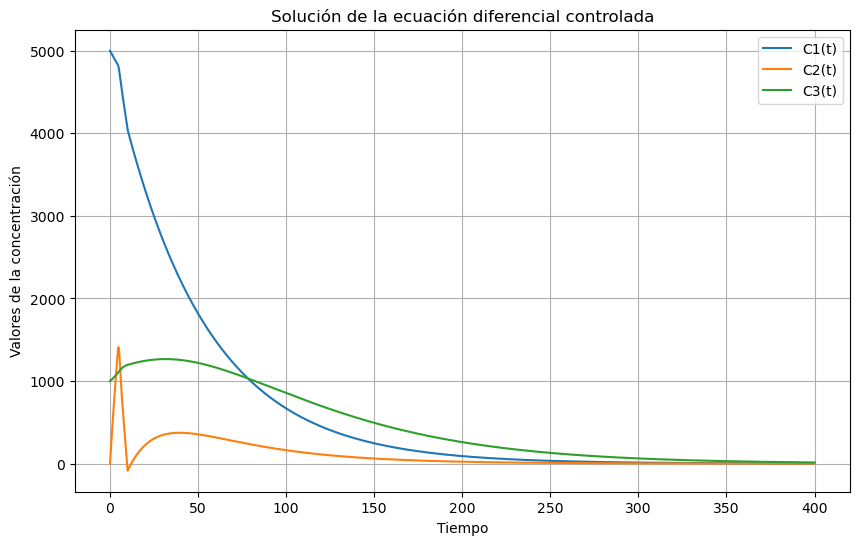

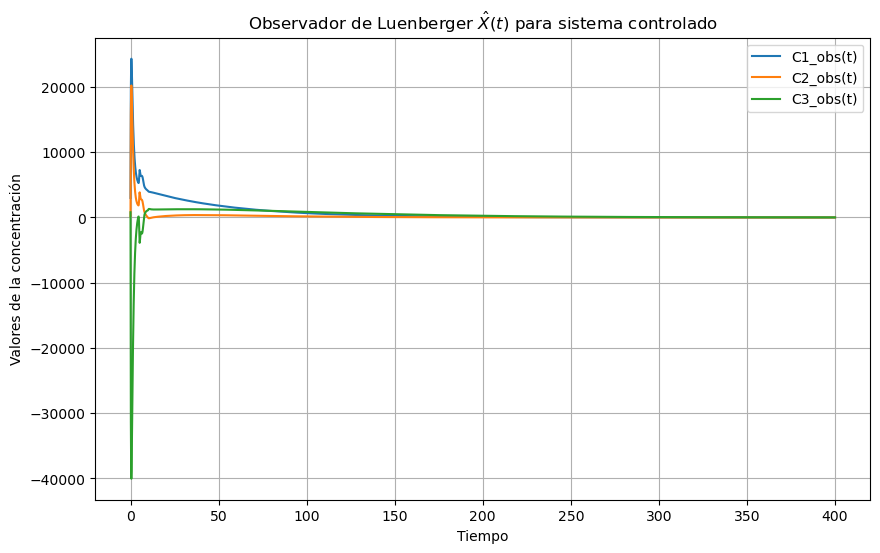

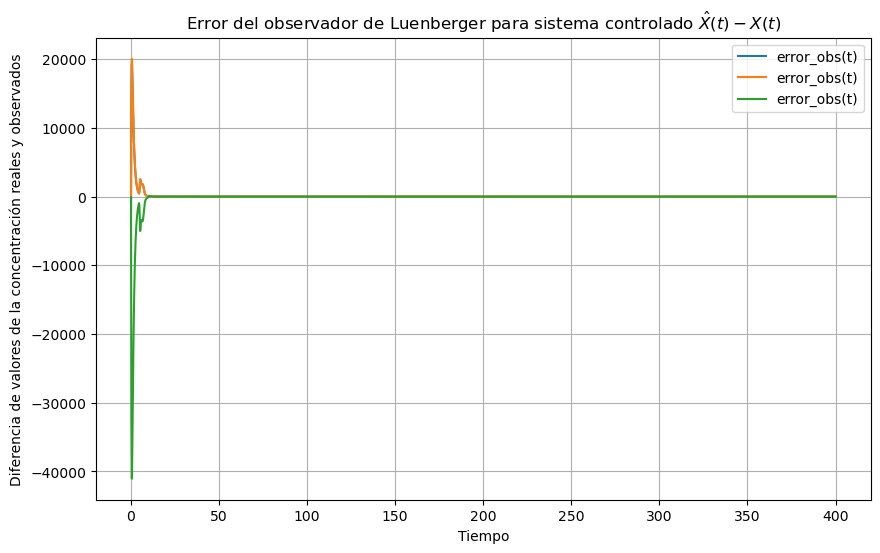

In [24]:
# Rendimiento del estimador de Luenberger con sistema controlado Bang Bang
grafica_solucion(solucion_ubangbang)
grafica_observacion(obsv_luenberger_ubangbang)
grafica_error(solucion_ubangbang, obsv_luenberger_ubangbang)

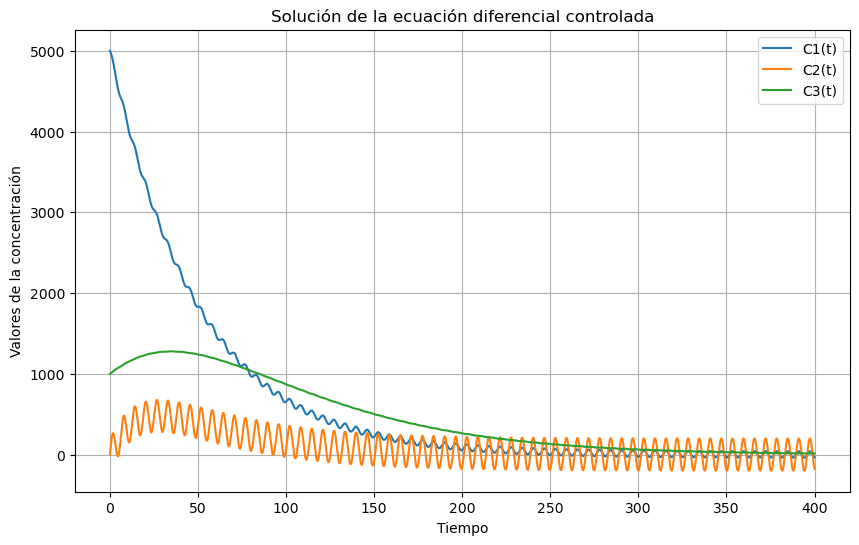

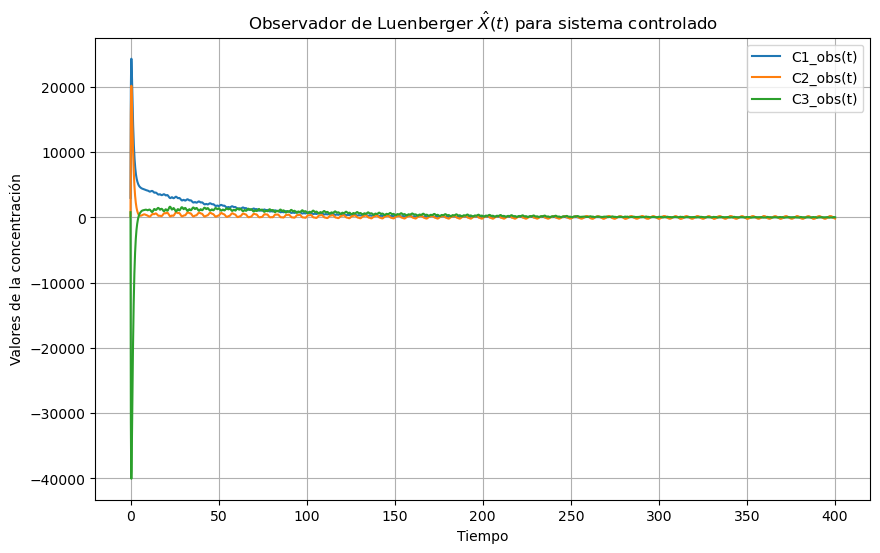

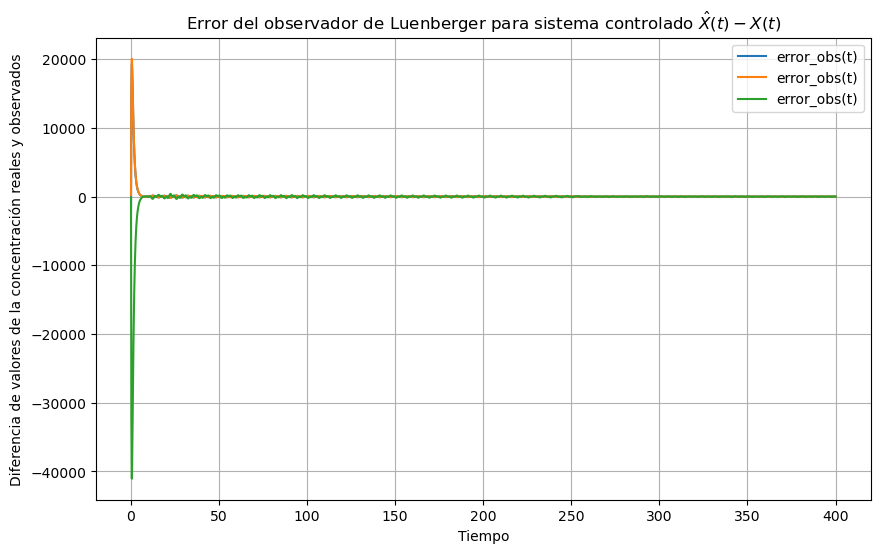

In [25]:
# Rendimiento del estimador de Luenberger con sistema con control sinusoidal
grafica_solucion(solucion_ucos)
grafica_observacion(obsv_luenberger_ucos)
grafica_error(solucion_ucos, obsv_luenberger_ucos)

Se verifica que el observador de Luenberger sigue aproximando la solución para las observaciones

$$Y(t) = \begin{bmatrix}
C_2(t) - C_1(t) \\
4C_2(t) + 2C_3(t)
\end{bmatrix}
= \begin{bmatrix}
-1 & 1 &0 \\
0 & 4 & 2
\end{bmatrix} X
$$

Se aprecia además que para el error se toman diferencias más drásticas en los primeros tiempos de simulación y luego converge rápidamente a cero

### Pregunta 9

Considerando los sistemas lineales controlados y observados del problema 5 se construye un control estabilizador por feedback lineal a partir de la observación $\vec{Y}$ .

Tenemos las observaciones

$$Y(t) = \begin{bmatrix}
C_2(t) \\
C_3(t)
\end{bmatrix}
= \begin{bmatrix}
0 & 1 &0 \\
0 & 0 & 1
\end{bmatrix} X
$$

Consideramos el control estabilizador del sistema por feedback lineal de la forma 
$$u(t) = K Y(t) = K C X$$

donde $K \in \mathbb{R}^{1 \times 2}$, dicho control entrega la dinámica

$$ \dot{X}(t) = A X(t)+ (BKC) X(t) = (A+BKC) X(t) $$

El sistema anterior sabemos se estabiliza a cero si la matriz $A +BKC$ resulta ser Hurwitz, por lo que debemos tomar valores $k_1$ y $k_2$ de $K = [k_1,k_2]$ de tal manera que $A+BKC$ cumpla dicha propiedad, se buscan valores por inspección.

In [26]:
# Definir las matrices A y B
A = np.matrix([[-4/200, 0, 0], [1/100, -6/100, 0], [2/300, 0.01, -5/300]])
B = np.matrix([4/200, 10/100, 0]).transpose()
C = np.matrix([[0, 1, 0], [0, 0, 1]])

k_1=-4
k_2=-5
K=np.matrix([k_1,k_2])

print('Valores propios de A +BKC:', Hurwitz(A + B @ (K @ C)))
print('¿Re(\lambda_{{A+BKC})) < 0 ?', (Hurwitz(A + B @ (K @ C)) < 0))

Valores propios de A +BKC: [-0.02578699+0.0068186j -0.02578699-0.0068186j -0.44509268+0.j       ]
¿Re(\lambda_{{A+BKC})) < 0 ? [ True  True  True]


Tenemos $K$ que hace Hurwitz la matriz $A + BKC$ tomando $K = [-4, -5]$

Finalmente modelamos el sistema con dicho control $u(t)$ y vemos si se estabiliza a partir de las observaciones $Y$ para distintas condiciones iniciales

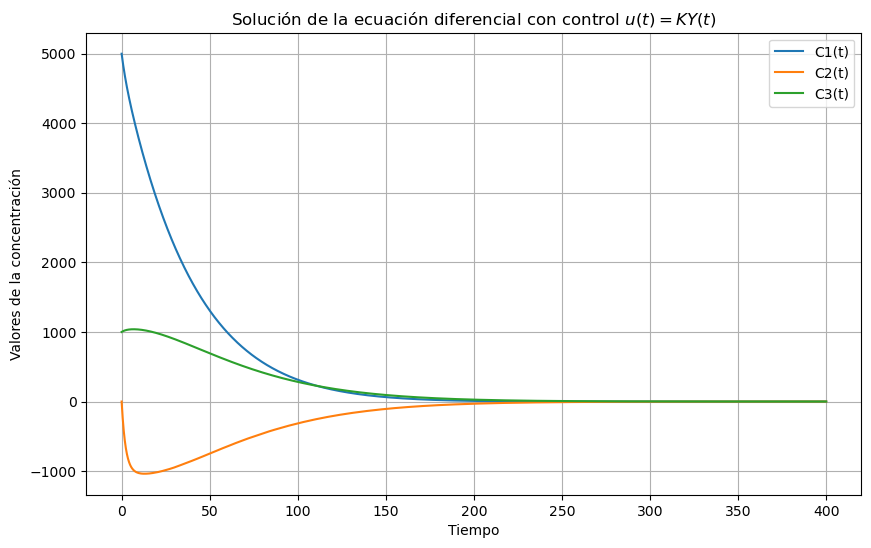

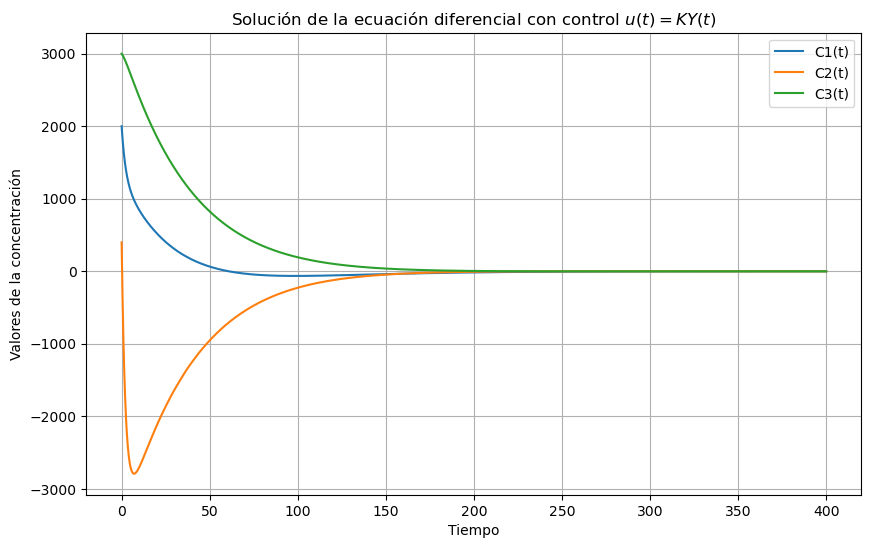

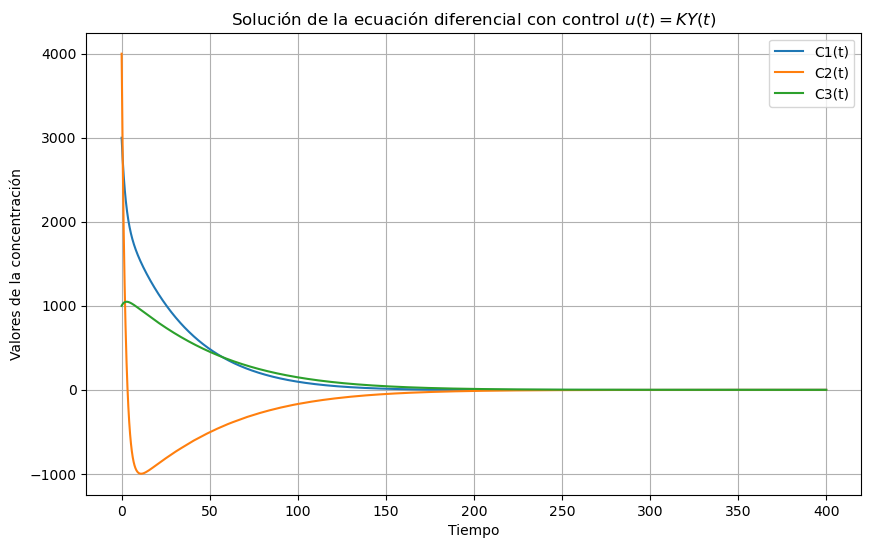

In [27]:
# Tiempo final de simulación
tf = 400
discr = 10*tf

# Intervalo de tiempo
t_span = (0, tf)

# Condición inicial del problema 
X0 = np.array([5000, 0, 1000]).T
X1 = np.array([2000, 400, 3000]).T
X2 = np.array([3000, 4000, 1000]).T

# Definimos la dinámica
def system_obsv_Y_feedback(K,C):
    def system_obsv_feedback(t,X):
        return np.dot(A + B @ (K @ C), X.T)
    return system_obsv_feedback

sol_obs_feedback_x0 = solve_ivp(system_obsv_Y_feedback(K,C), t_span, X0, method='RK45', t_eval=np.linspace(0, tf, discr)) 
sol_obs_feedback_x1 = solve_ivp(system_obsv_Y_feedback(K,C), t_span, X1, method='RK45', t_eval=np.linspace(0, tf, discr)) 
sol_obs_feedback_x2 = solve_ivp(system_obsv_Y_feedback(K,C), t_span, X2, method='RK45', t_eval=np.linspace(0, tf, discr)) 

# Graficar la solución
def grafica_sol_obvs(solution):
    t_obs_feedback = solution.t
    X_hat = solution.y
    plt.figure(figsize=(10, 6))
    plt.plot(t_obs_feedback, X_hat[0], label='C1(t)')
    plt.plot(t_obs_feedback, X_hat[1], label='C2(t)')
    plt.plot(t_obs_feedback, X_hat[2], label='C3(t)')
    plt.xlabel('Tiempo')
    plt.ylabel('Valores de la concentración')
    plt.legend()
    plt.title(r'Solución de la ecuación diferencial con control $u(t) = K Y(t)$')
    plt.grid(True)
    plt.show()
    
grafica_sol_obvs(sol_obs_feedback_x0)
grafica_sol_obvs(sol_obs_feedback_x1)
grafica_sol_obvs(sol_obs_feedback_x2)

Verificamos que las soluciones para cada condición inicial se estabilizan en cero a partir del control por retroalimentación de las observaciones $u(t) = K Y(t)$